<a href="https://colab.research.google.com/github/Nikita1013/Machine-Learning-with-Python/blob/master/K_Nearest_Neighbors_Classifier_from_scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN Classifier is also called as Lazy Model**

Euclidean Distance

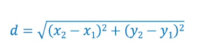

Manhattan Distance

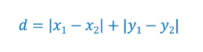

Importing the Dependencies

In [ ]:
import numpy as np
import statistics

K-Nearest Neighbors Classifier

In [ ]:
import numpy as np
import statistics

class KNN_Classifier():

    # initiating the parameters
    def __init__(self, distance_metric):
        self.distance_metric = distance_metric

    # getting the distance metric
    def get_distance_metric(self, training_data_point, test_data_point):
        if self.distance_metric == 'euclidean':
            dist = 0
            for i in range(len(training_data_point) - 1):
                dist += (training_data_point[i] - test_data_point[i]) ** 2
            euclidean_dist = np.sqrt(dist)
            return euclidean_dist

        elif self.distance_metric == 'manhattan':
            dist = 0
            for i in range(len(training_data_point) - 1):
                dist += abs(training_data_point[i] - test_data_point[i])
            manhattan_dist = dist
            return manhattan_dist

    # getting the nearest neighbors
    def nearest_neighbors(self, X_train, test_data, k):
        distance_list = []

        for training_data in X_train:
            distance = self.get_distance_metric(training_data, test_data)
            distance_list.append((training_data, distance))

        distance_list.sort(key=lambda x: x[1])

        neighbors_list = []
        for j in range(k):
            neighbors_list.append(distance_list[j][0])

        return neighbors_list

    # predict the class of the new data point
    def predict(self, X_train, test_data, k):
        neighbors = self.nearest_neighbors(X_train, test_data, k)
        label = []
        for data in neighbors:
            label.append(data[-1])
        predicted_class = statistics.mode(label)
        return predicted_class


Diabetes Prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# loading the diabetes dataset to the pandas dataframe
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# printing the last 5 rows of the dataset
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# separating the features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
# converting the data to numpy array
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [ ]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
print(X_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 3.24e+01 1.41e-01 2.40e+01]
 [6.00e+00 1.05e+02 7.00e+01 ... 3.08e+01 1.22e-01 3.70e+01]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.01e+01 3.98e-01 5.90e+01]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [4.00e+00 1.12e+02 7.80e+01 ... 3.94e+01 2.36e-01 3.80e+01]
 [0.00e+00 8.60e+01 6.80e+01 ... 3.58e+01 2.38e-01 2.50e+01]]


In [ ]:
print(Y_train)

[1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 

In [ ]:
#The training data should contain the features and target so we add the Y_train i.e. Target column to the X_train data
X_train = np.insert(X_train, 8, Y_train, axis=1)

In [ ]:
print(X_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 1.41e-01 2.40e+01 1.00e+00]
 [6.00e+00 1.05e+02 7.00e+01 ... 1.22e-01 3.70e+01 0.00e+00]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.98e-01 5.90e+01 1.00e+00]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.00e-01 3.50e+01 0.00e+00]
 [4.00e+00 1.12e+02 7.80e+01 ... 2.36e-01 3.80e+01 0.00e+00]
 [0.00e+00 8.60e+01 6.80e+01 ... 2.38e-01 2.50e+01 0.00e+00]]


In [ ]:
X_train.shape

(614, 9)

In [ ]:
print(X_train[:,8])

[1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.

X_train --->  training data with features and target

X_test --->  test data without target

**Model Training : KNN Classifier**

In [ ]:
classifier = KNN_Classifier(distance_metric='euclidean')

**NOTE : ** The KNN Classifier can predict the label for only one data point at a time

In [ ]:
prediction = classifier.predict(X_train, X_test[0], k=5)

In [ ]:
print(X_test[0])

[  3.    106.     72.      0.      0.     25.8     0.207  27.   ]


In [ ]:
print(Y_test[0])

0


In [ ]:
print(prediction)

0.0


In [ ]:
X_test.shape

(154, 8)

In [ ]:
X_test_size = X_test.shape[0]
print(X_test_size)

154


In [ ]:
y_pred = []

for i in range(X_test_size):
  prediction =  classifier.predict(X_train, X_test[i], k=5)
  y_pred.append(prediction)

In [ ]:
print(y_pred)

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.

In [ ]:
y_true = Y_test

Model Evaluation

In [ ]:
accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy*100)  # accuracy score in %

72.72727272727273
